In [ ]:
import json
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
train_data = pd.read_csv('shuffled_train_data.csv', index_col = None)
train_labels = pd.read_csv('shuffled_train_labels.csv', index_col = None)

test_data = pd.read_csv('test_data.csv',index_col = None)
test_labels = pd.read_csv('test_labels.csv',index_col = None)

validation_data = pd.read_csv('validation_data.csv',index_col = None)
validation_labels = pd.read_csv('validation_labels.csv',index_col = None)

In [ ]:
train_df = pd.DataFrame({'text': train_data.iloc[:, 0], 'label': train_labels.iloc[:, 0]})
test_df = pd.DataFrame({'text': test_data.iloc[:, 0], 'label': test_labels.iloc[:, 0]})
validation_df = pd.DataFrame({'text': validation_data.iloc[:, 0], 'label': validation_labels.iloc[:, 0]})

In [ ]:
train_df

text            label
0     Rant: Nu este de ajuns doar sa cumparam origin...    no_depression
1     True Grit - Secretul succesului   \n\nEste evi...    no_depression
2     Experiente care v-au schimbat mentalitatea Bun...    no_depression
3     Subreddit-ul asta ar trebui sa se numeasca r/d...    no_depression
4     Era ticalosilor Entr’acte\n\nUnchiul meu. Unul...    no_depression
...                                                 ...              ...
2095  Mersul la sala si eticheta Mno am inceput sa m...  true_depression
2096  Maine am sala si nu imi pot controla emotiile ...  true_depression
2097  Stie cineva daca gasesc undeva granita italian...  true_depression
2098  Mi-e somn in permanenta si nu stiu ce sa mai f...  true_depression
2099  Rodditori programatori si oameni buni, daca va...  true_depression

[2100 rows x 2 columns]

In [ ]:
!pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 5.7 MB/s eta 0:00:00


### **Digits**

In [ ]:
from unidecode import unidecode

train_df['text'] = train_df['text'].apply(unidecode)
test_df['text'] = test_df['text'].apply(unidecode)
validation_df['text'] = validation_df['text'].apply(unidecode)

In [ ]:
def plot_cifre_per_clasa(label, color, data_csv, label_csv):
    data_per_clasa = data_csv[data_csv['label'] == label]

    digit_frequencies = {str(i): 0 for i in range(10)}

    for text in data_per_clasa['text']:
        for char in text:
            if char.isdigit():
                digit_frequencies[char] += 1

    labels = list(digit_frequencies.keys())
    frequencies = list(digit_frequencies.values())

    plt.bar(labels, frequencies, color=color)

    plt.xlabel("Digits")
    plt.ylabel("Frequency")
    plt.title(f"The distribution of digits in the {label} class on {label_csv}")
    plt.show()

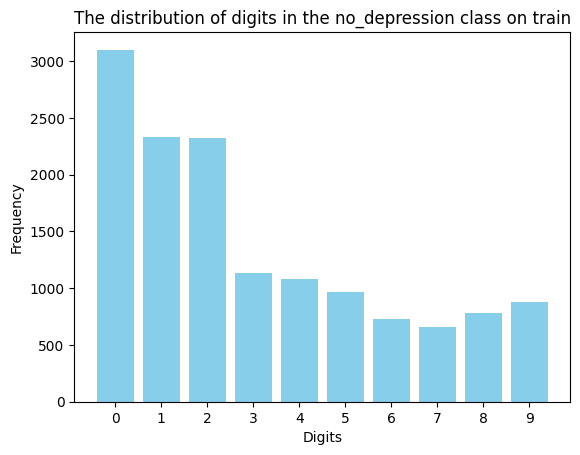

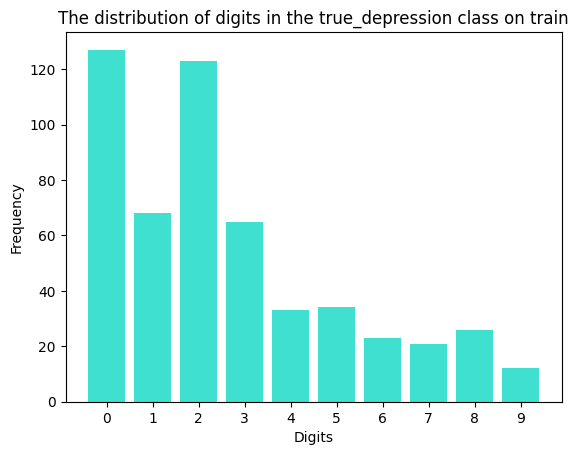

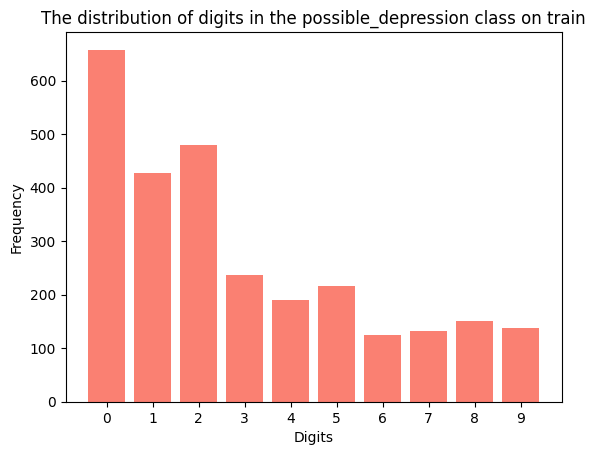

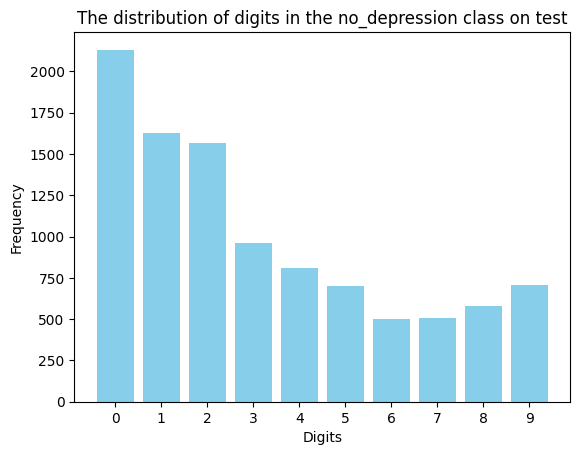

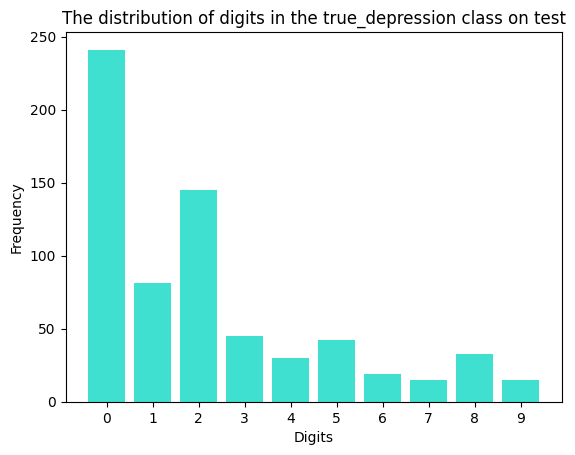

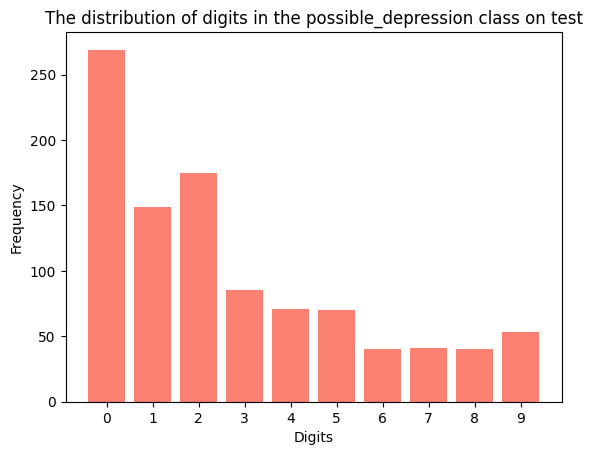

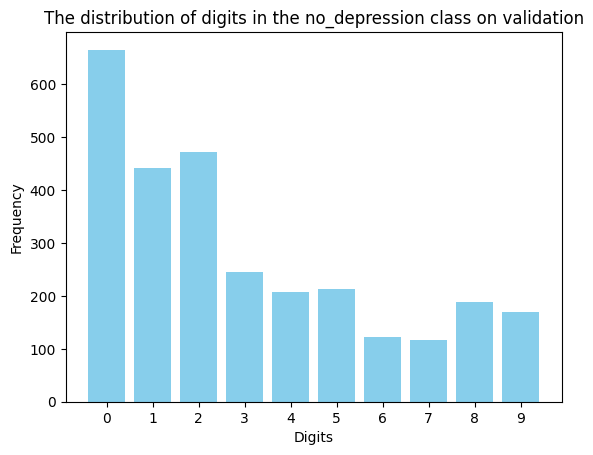

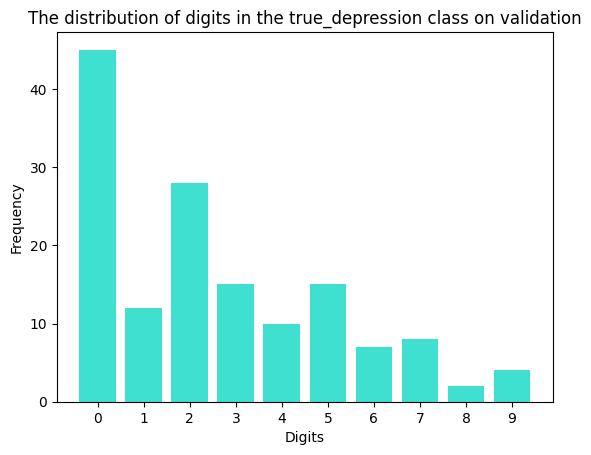

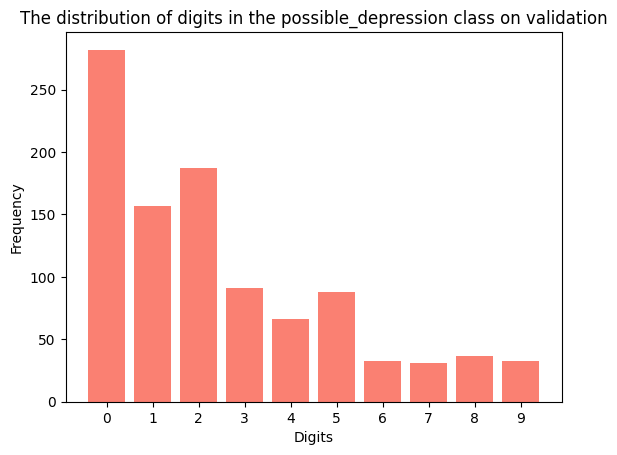

In [ ]:
plot_cifre_per_clasa('no_depression', 'skyblue', train_df, 'train')
plot_cifre_per_clasa('true_depression', 'turquoise', train_df, 'train')
plot_cifre_per_clasa('possible_depression', 'salmon', train_df, 'train')

plot_cifre_per_clasa('no_depression', 'skyblue', test_df, 'test')
plot_cifre_per_clasa('true_depression', 'turquoise', test_df, 'test')
plot_cifre_per_clasa('possible_depression', 'salmon', test_df, 'test')

plot_cifre_per_clasa('no_depression', 'skyblue', validation_df, 'validation')
plot_cifre_per_clasa('true_depression', 'turquoise', validation_df, 'validation')
plot_cifre_per_clasa('possible_depression', 'salmon', validation_df, 'validation')

### **Stopwords**

In [ ]:
stop_words = set(stopwords.words('romanian'))
from collections import defaultdict
def plot_stopwords_per_clasa(label, color, data_csv, label_csv):
    data_per_clasa_words = data_csv[data_csv['label'] == label]['text'].str.split()

    stops_count = defaultdict(int)
    for words in data_per_clasa_words:
        for word in words:
            if word.lower() in stop_words:
                stops_count[word] += 1

    stops_count = sorted(stops_count.items(), key= lambda x: x[1], reverse=True)
    stops_count = dict(stops_count[:15])

    plt.bar(stops_count.keys(), stops_count.values(), color=color)
    plt.xlabel("Stopword")
    plt.ylabel("Frequency")
    plt.title(f"Distrib. of the 15 most fq. stopwords in the {label} class on {label_csv}")
    plt.show()

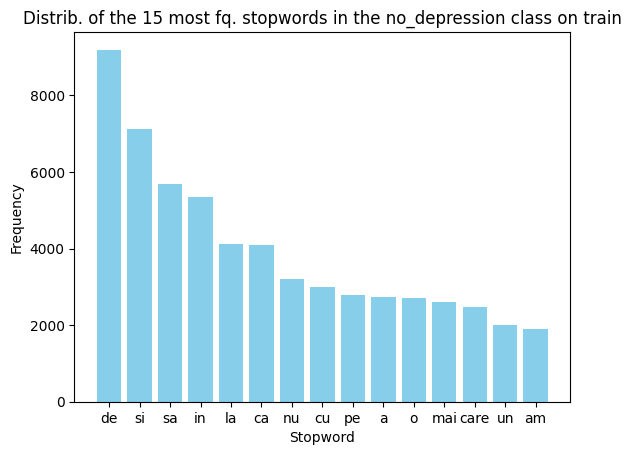

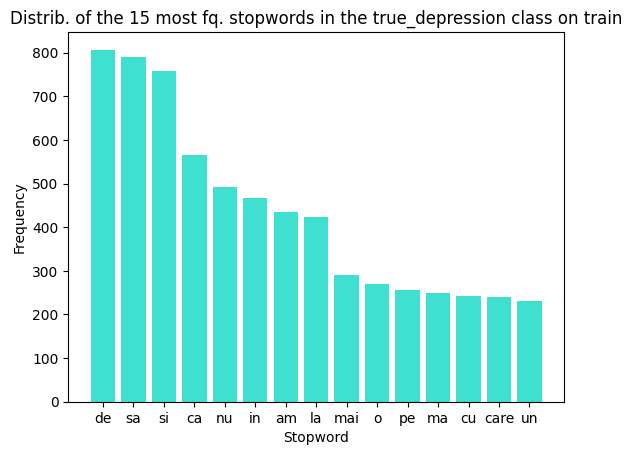

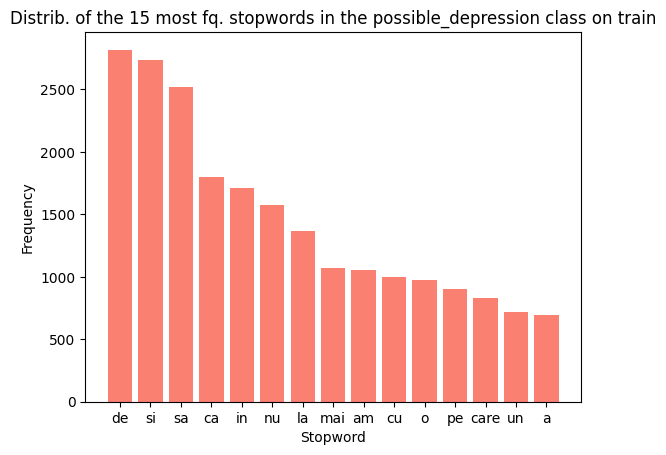

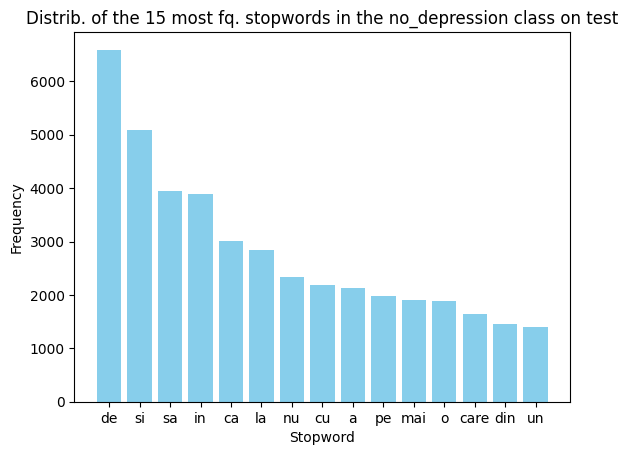

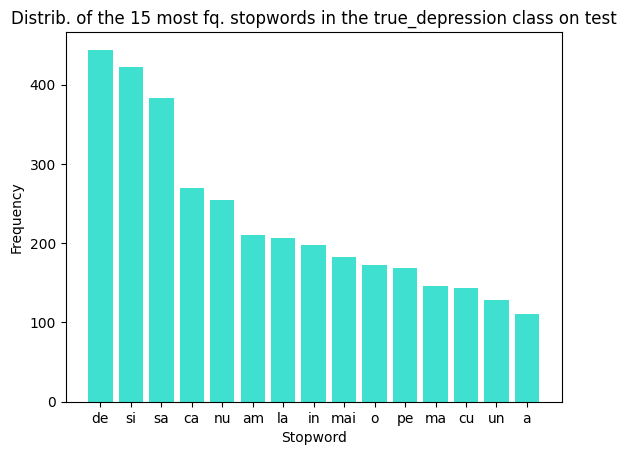

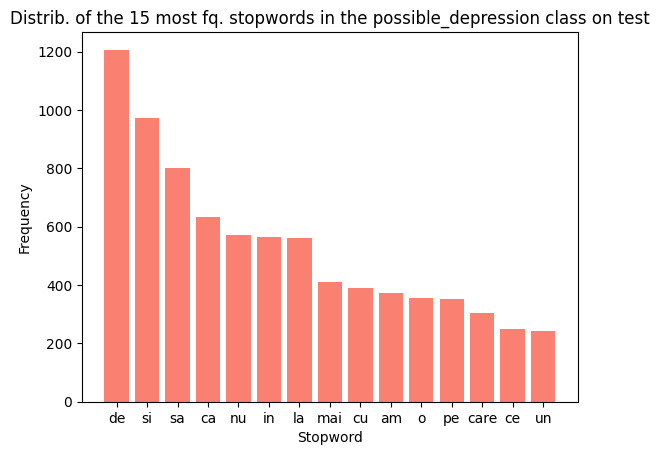

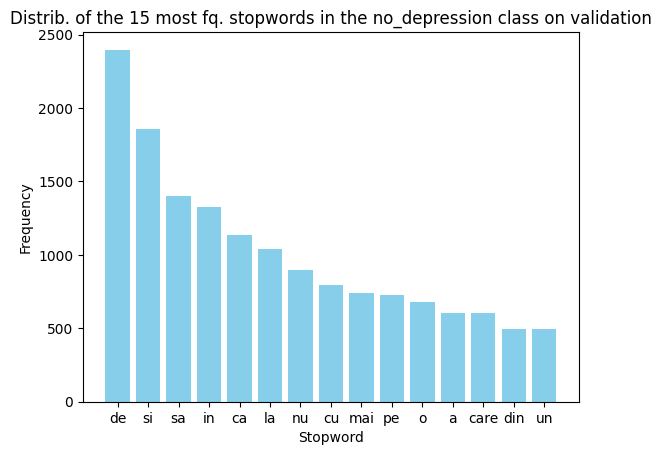

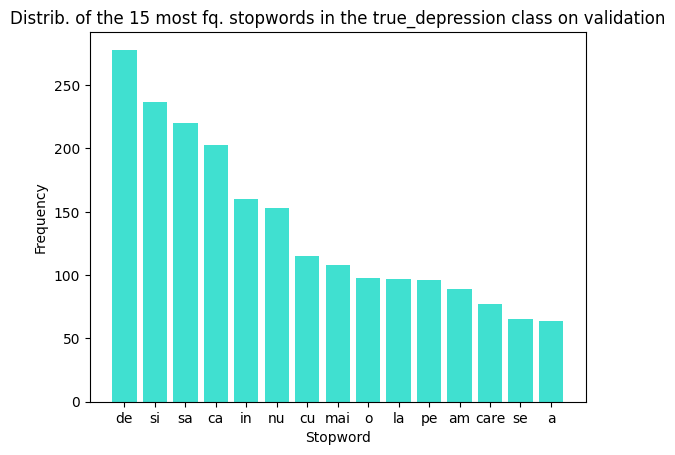

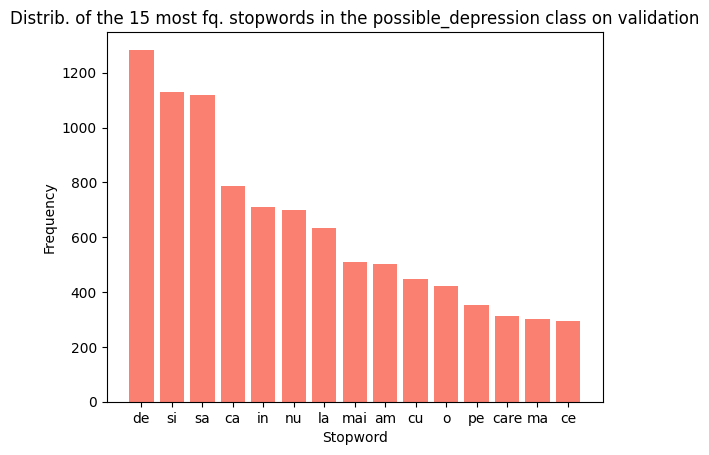

In [ ]:
plot_stopwords_per_clasa('no_depression', 'skyblue', train_df, 'train')
plot_stopwords_per_clasa('true_depression', 'turquoise', train_df, 'train')
plot_stopwords_per_clasa('possible_depression', 'salmon', train_df, 'train')

plot_stopwords_per_clasa('no_depression', 'skyblue', test_df, 'test')
plot_stopwords_per_clasa('true_depression', 'turquoise', test_df, 'test')
plot_stopwords_per_clasa('possible_depression', 'salmon', test_df, 'test')

plot_stopwords_per_clasa('no_depression', 'skyblue', validation_df, 'validation')
plot_stopwords_per_clasa('true_depression', 'turquoise', validation_df, 'validation')
plot_stopwords_per_clasa('possible_depression', 'salmon', validation_df, 'validation')

### **Class Distribution**

In [ ]:
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{:.1f}%\n({v:d})'.format(pct, v=val)
    return my_format

def class_distribution(df, title):
    label_counts = df['label'].value_counts()

    plt.pie(label_counts, labels = label_counts.index, autopct=autopct_format(label_counts))
    plt.xlabel('')
    plt.ylabel('')
    plt.title('Class Distribution on ' + title + ' Data')

    plt.show()

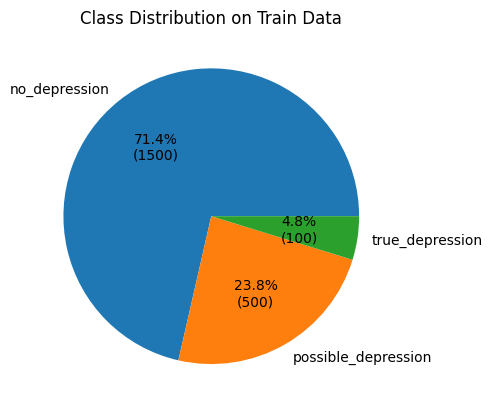

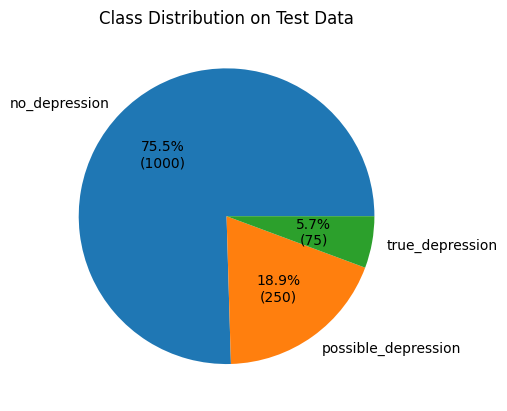

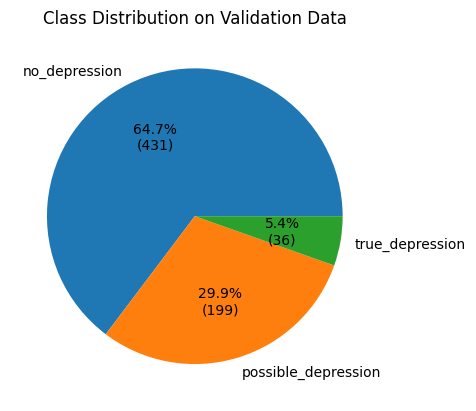

In [ ]:
class_distribution(train_df, "Train")
class_distribution(test_df, "Test")
class_distribution(validation_df, "Validation")

### **Punctuation Distribution**

In [ ]:
def count_punctuation(df, typed, color):

    for i, label in enumerate(df['label'].unique()):
        df_label = df[df['label'] == label]

        punctuation_list = df_label['text'].apply(lambda text: re.findall(r'[^\w\s]', text)).explode().tolist()

        top_punctuation = pd.Series(punctuation_list).value_counts().nlargest(10)
        top_punctuation.plot(kind='bar', color=color)
        plt.xlabel('Punctuation Mark')
        plt.ylabel('Count')
        plt.title(f'Punctuation Distribution for Label {label} on {typed} data')
        plt.xticks(rotation=45, ha='right')

        plt.show()

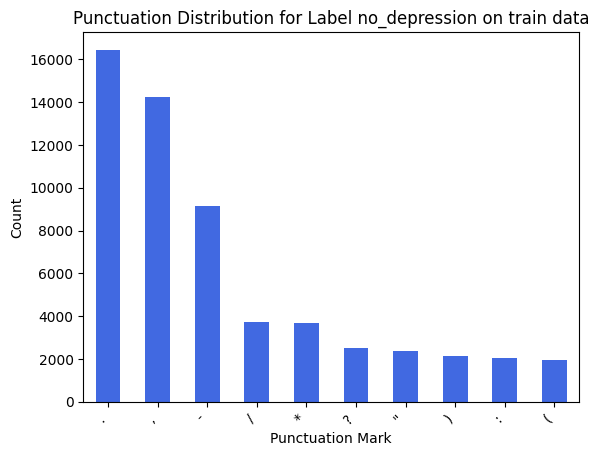

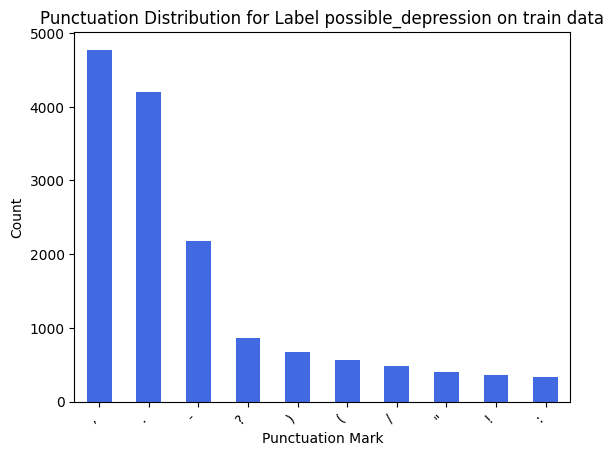

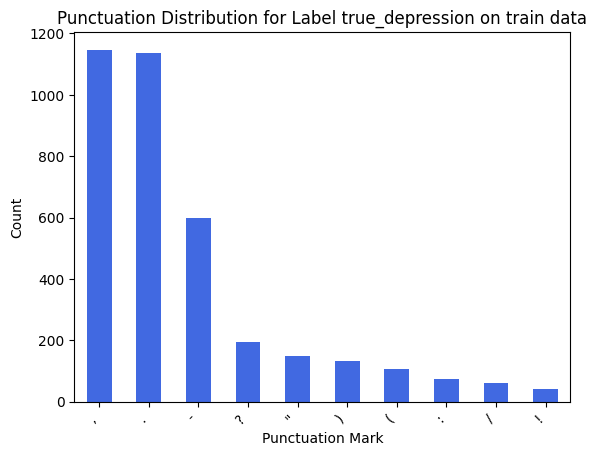

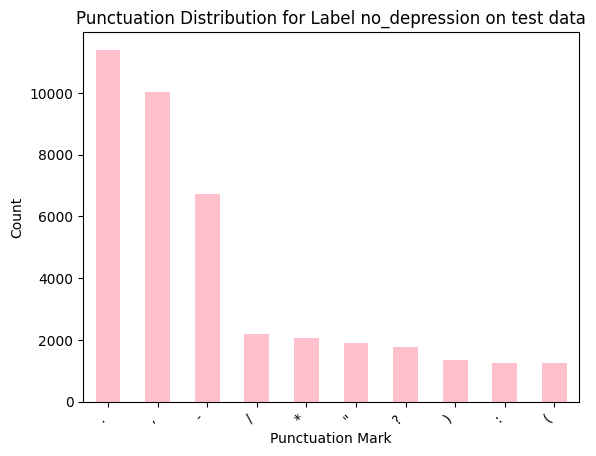

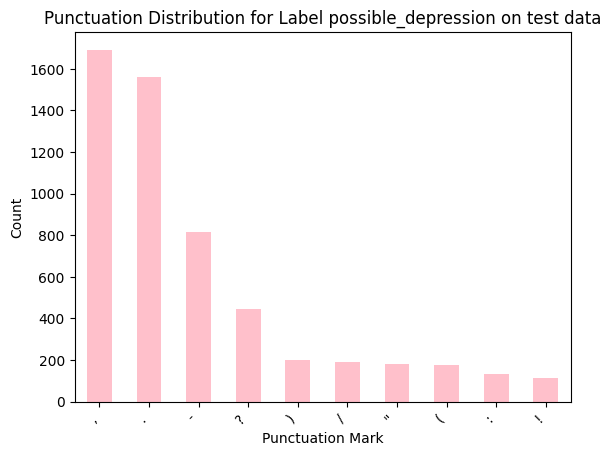

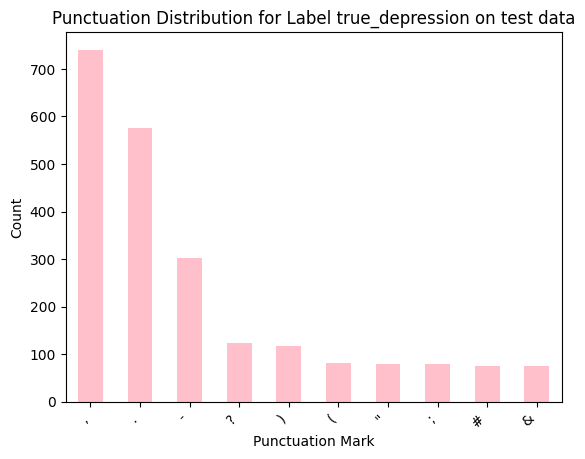

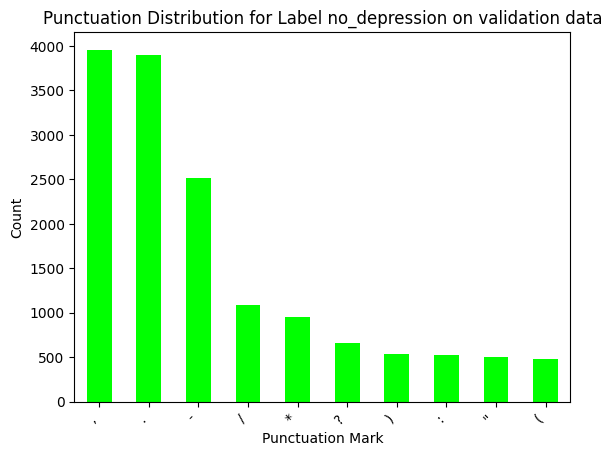

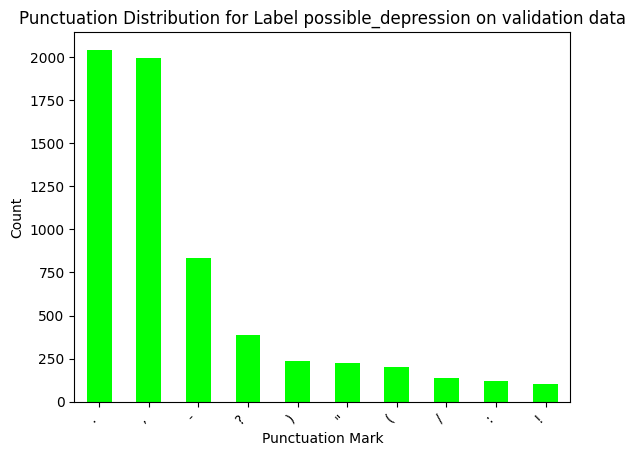

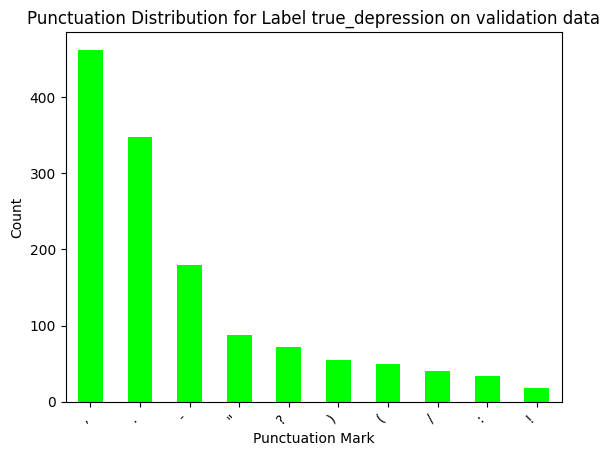

In [ ]:
count_punctuation(train_df, "train", "royalblue")
count_punctuation(test_df, "test", "pink")
count_punctuation(validation_df, "validation", "lime")

In [ ]:
def posts(df, dataset_label, color):
    df['selftext_length'] = df['text'].apply(len)

    for label in df['label'].unique():
        plt.figure(figsize=(10, 6))

        df_label = df[df['label'] == label]

        plt.hist(df_label['selftext_length'], bins=20, color=color, edgecolor='black')

        plt.title(f'Post length distribution for label "{label}" in {dataset_label} data')
        plt.xlabel('Post length (nr of words)')
        plt.ylabel('Nr of posts')

        plt.show()


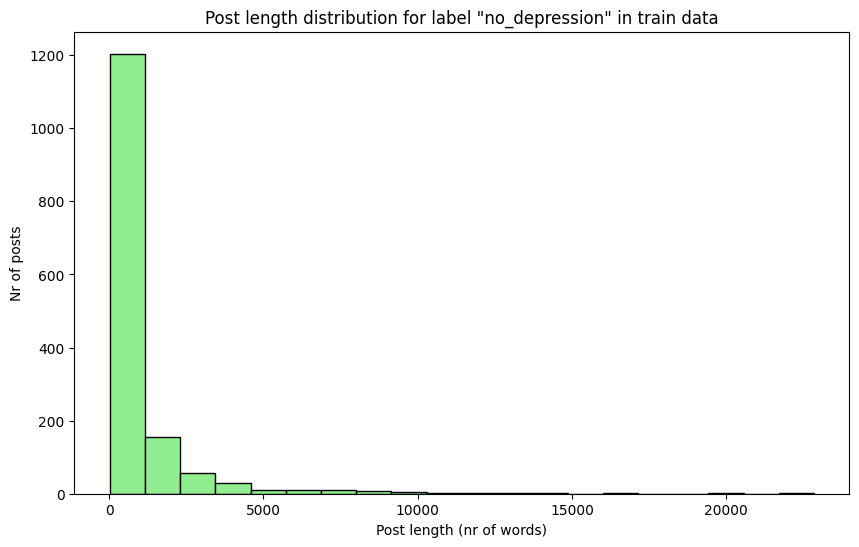

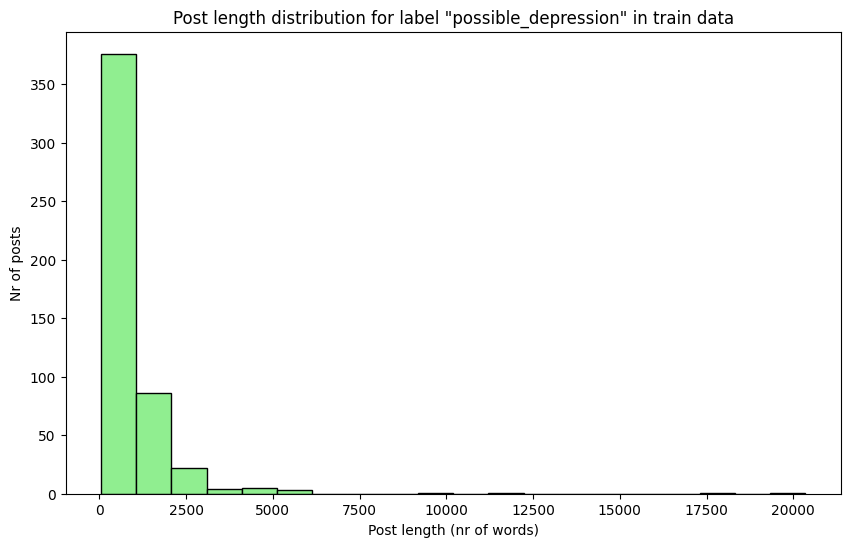

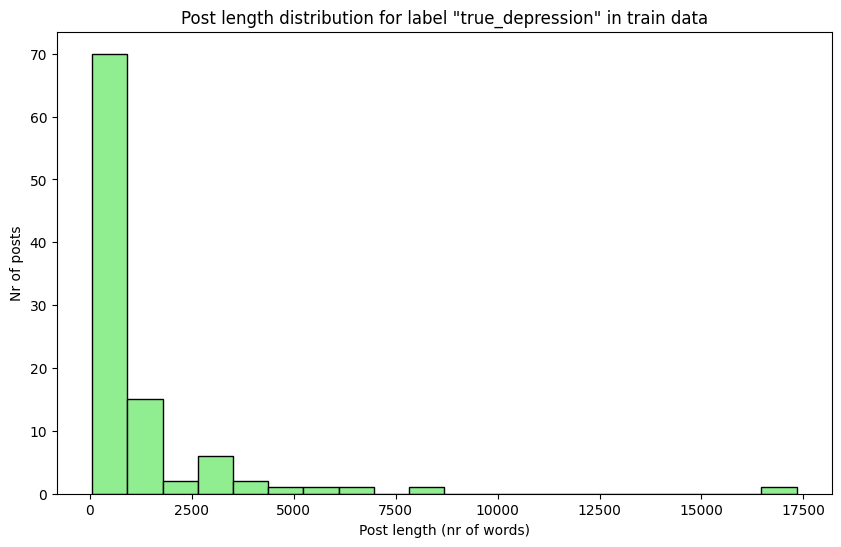

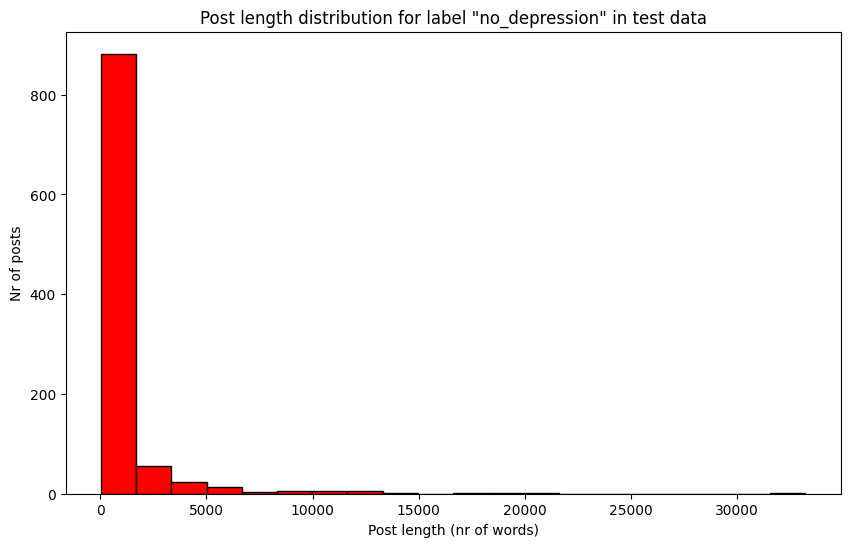

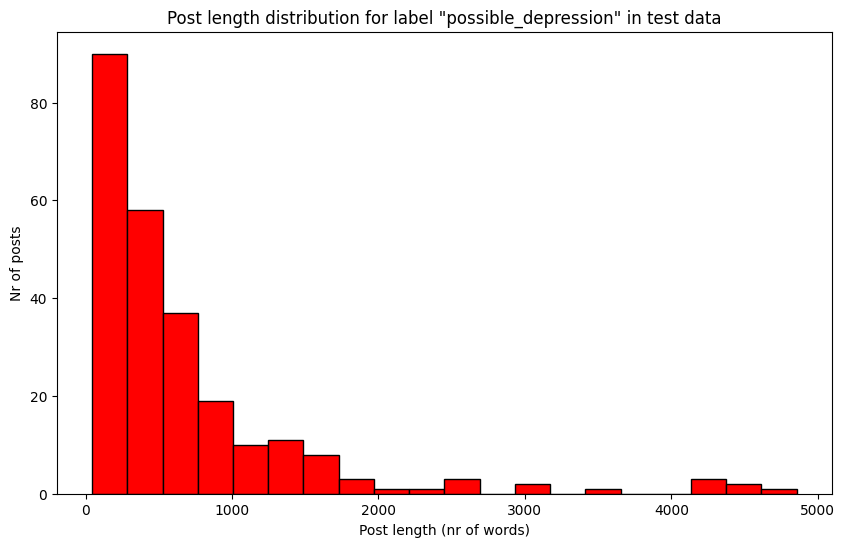

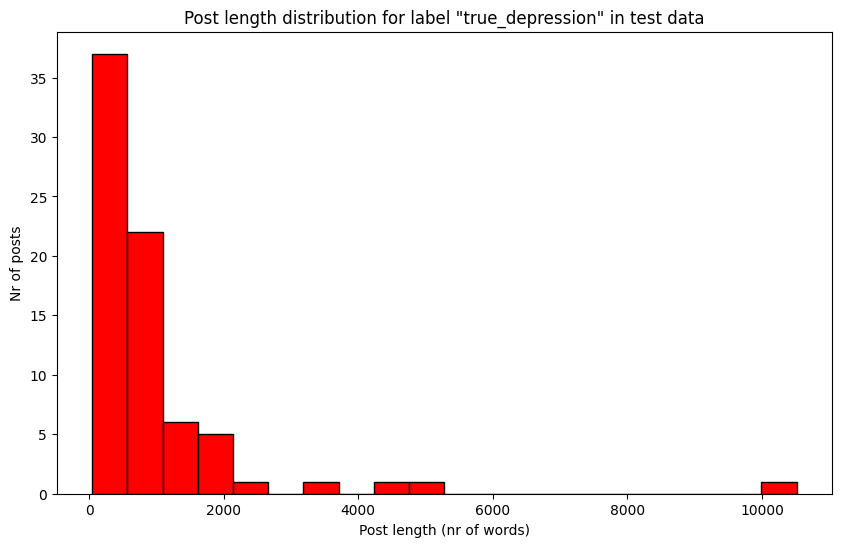

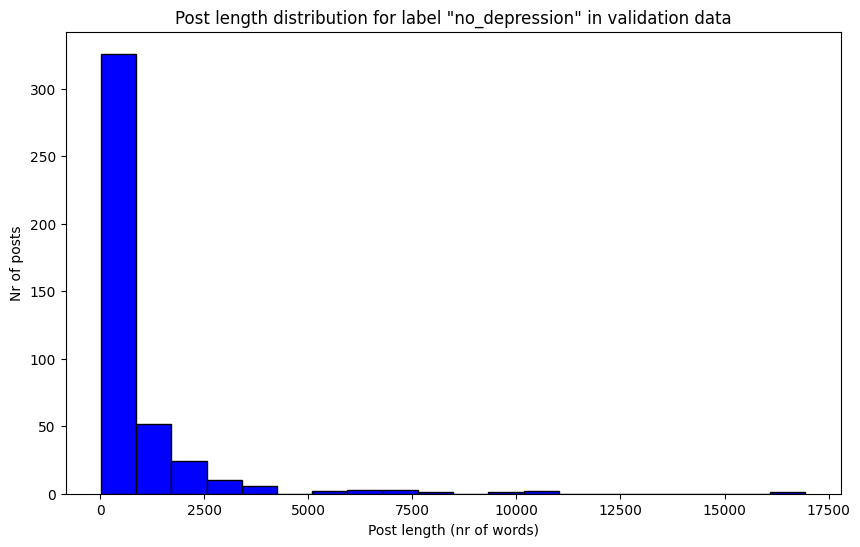

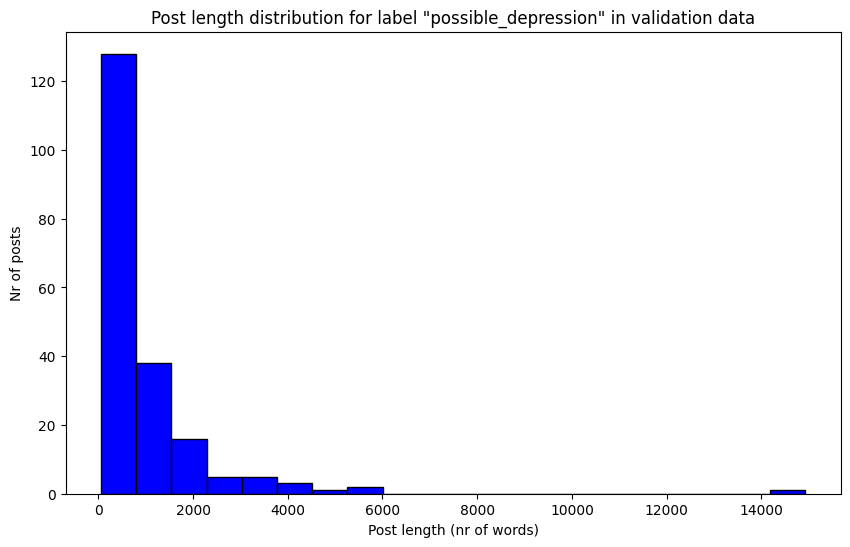

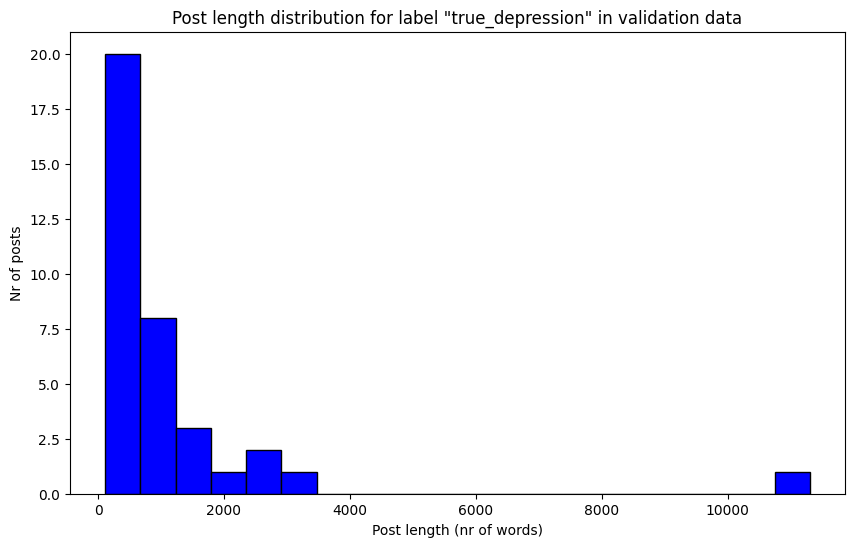

In [ ]:
posts(train_df, "train", "lightgreen")
posts(test_df, "test", "red")
posts(validation_df, "validation", "blue")

### **Bigrams/Trigrams**

In [ ]:
#N-grame
from nltk import FreqDist
from nltk.tokenize import word_tokenize

In [ ]:
def plot_bigrams_trigrams(data_csv, label_csv):
    stop_words = set(stopwords.words('romanian'))
    tokens = [word for text in data_csv['text'] for word in word_tokenize(text.lower()) if word.isalpha() and word not in stop_words]

    bigrame = list(nltk.bigrams(tokens))
    frecventa_bigrame = FreqDist(bigrame)
    top_15_bigrame = frecventa_bigrame.most_common(15)

    values = []
    labels = []
    for el in top_15_bigrame:
        #un element are forma (('well', 'made'), 889)
        labels.append(el[0][0] + " " + el[0][1])
        values.append(el[1])

    plt.bar(labels, values, color='pink')
    plt.xlabel('Bigrams')
    plt.ylabel('Frequency')
    plt.title(f"The most common 15 bigrams on {label_csv}")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    trigrams = list(nltk.trigrams(tokens))
    frecventa_trigrams = FreqDist(trigrams)
    top_15_trigrams = frecventa_trigrams.most_common(15)

    values = []
    labels = []
    for el in top_15_trigrams:
        #un element are forma (('fit', 'true', 'size'), 90)
        labels.append(el[0][0] + " " + el[0][1] + " " + el[0][2])
        values.append(el[1])

    plt.bar(labels, values, color='moccasin')
    plt.xlabel('Trigrams')
    plt.ylabel('Frequency')
    plt.title(f"The most common 15 trigrams on {label_csv}")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

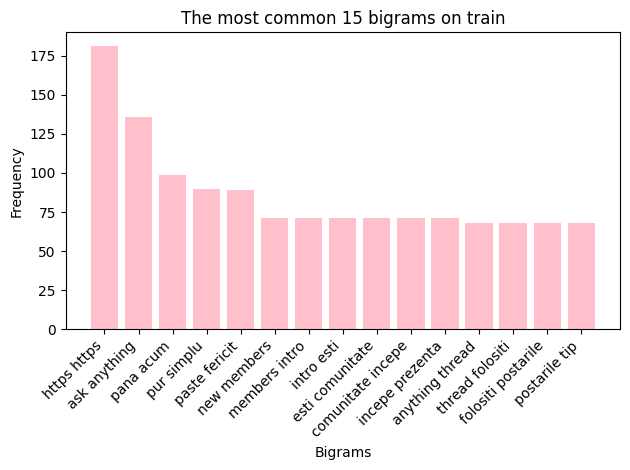

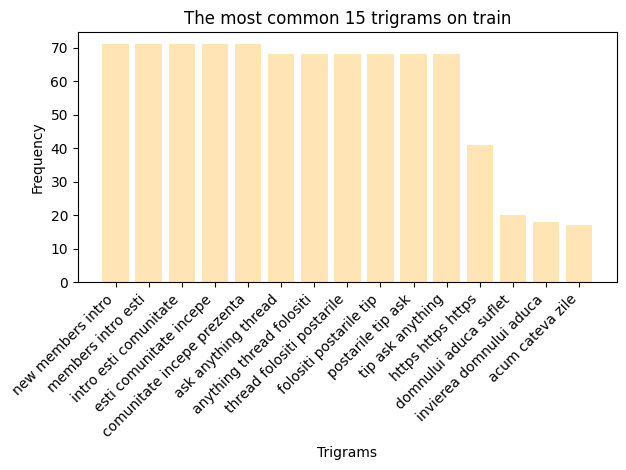

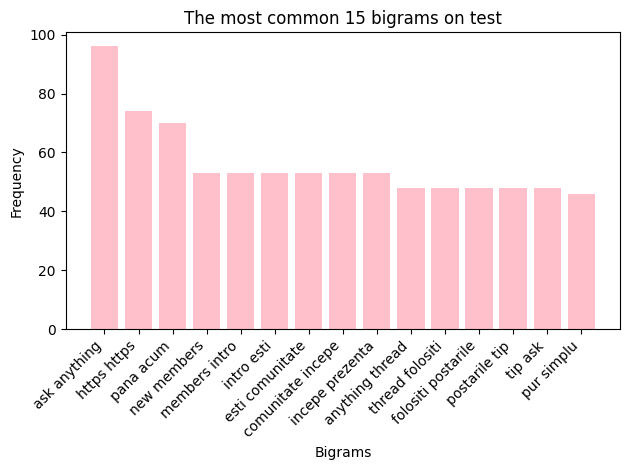

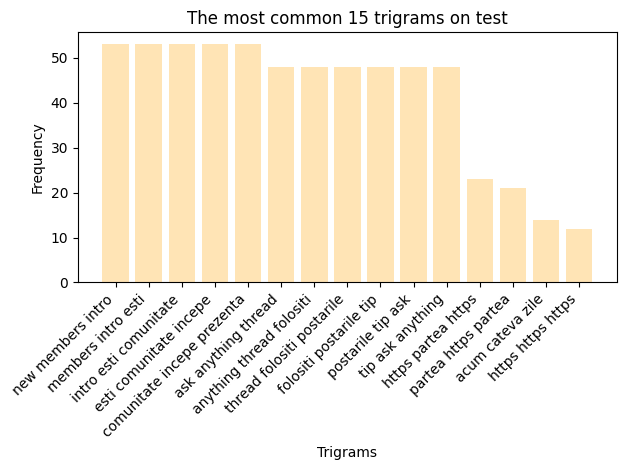

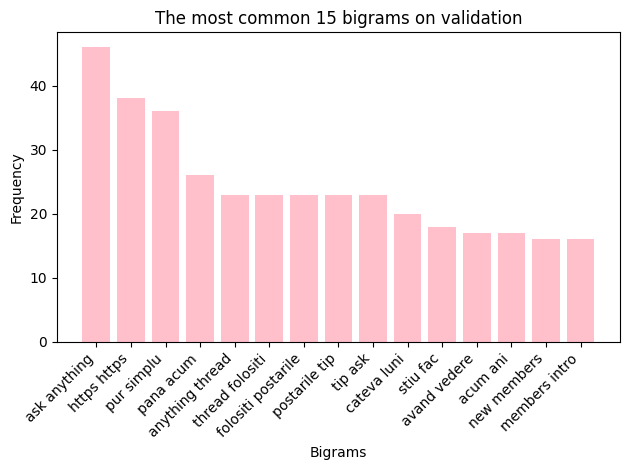

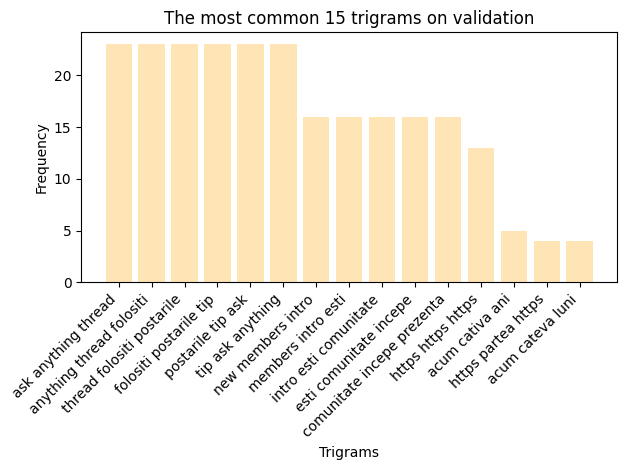

In [ ]:
plot_bigrams_trigrams(train_df, 'train')
plot_bigrams_trigrams(test_df, 'test')
plot_bigrams_trigrams(validation_df, 'validation')

### **WORDCLOUD**

In [ ]:
stopwords_ro = set(unidecode(word) for word in stopwords.words('romanian'))

In [ ]:
from wordcloud import WordCloud

def preprocess_text(text):
    text = unidecode(re.sub(r'[^\w\s]', '', text)).lower()
    filtered_text = ' '.join(word for word in text.split() if word not in stopwords_ro)
    return filtered_text

def wordcloud(df, dataset_label):
    for label in df['label'].unique():
        df_label = df[df['label'] == label]

        all_text = ' '.join(df_label['text'].apply(preprocess_text))

        wordcloud = WordCloud(
            width=800, height=400, background_color='white'
        ).generate(all_text)

        plt.figure(figsize=(10, 6))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Wordcloud for {label} in {dataset_label} data')
        plt.axis('off')
        plt.show()


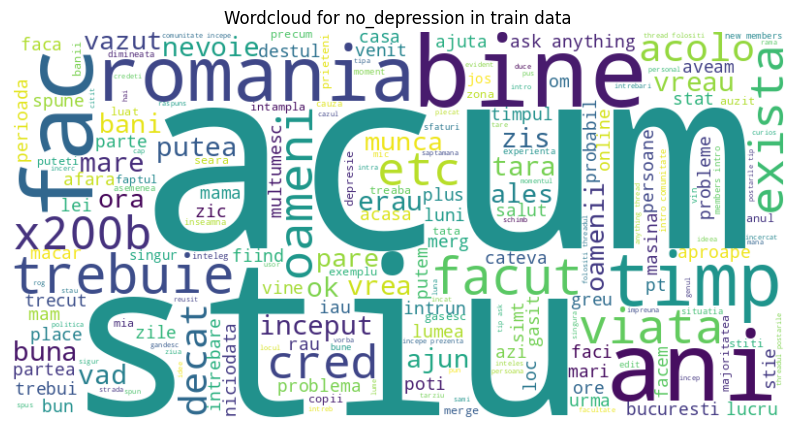

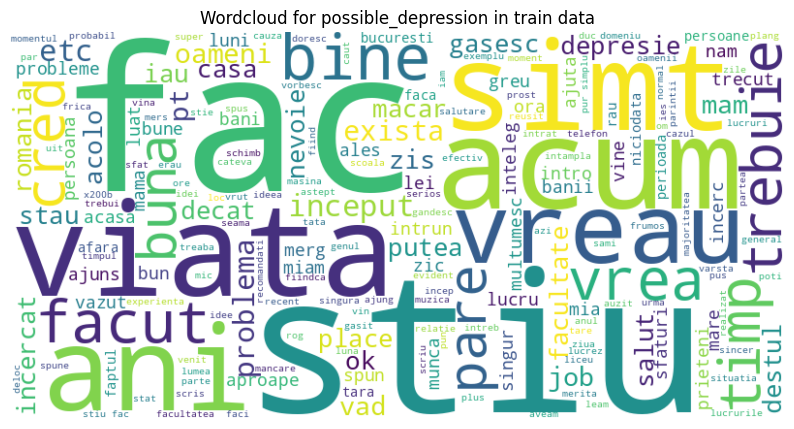

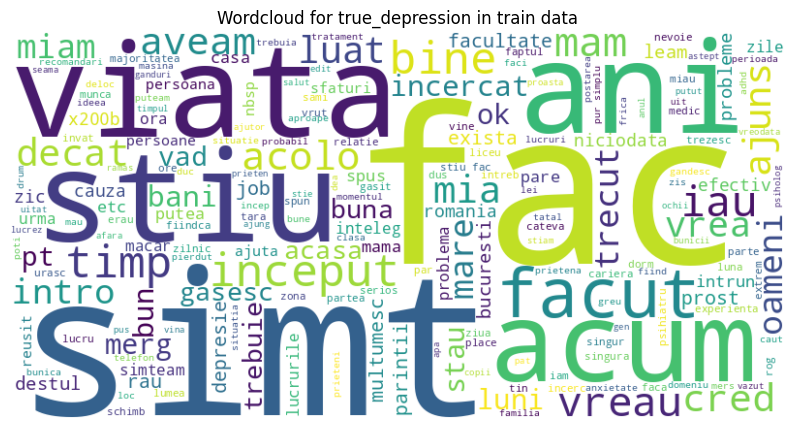

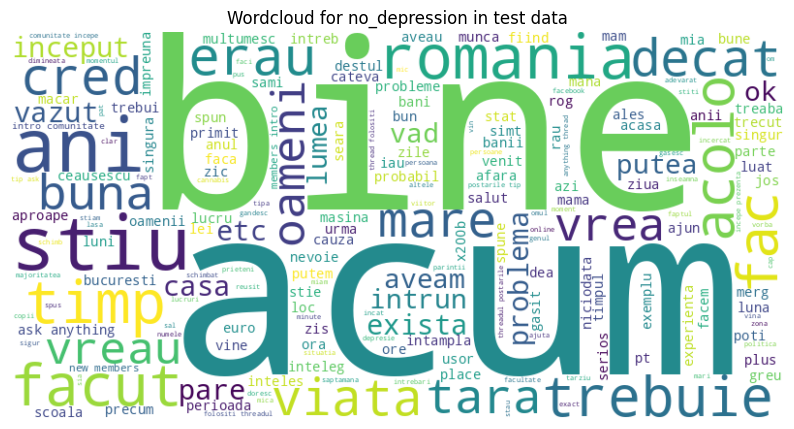

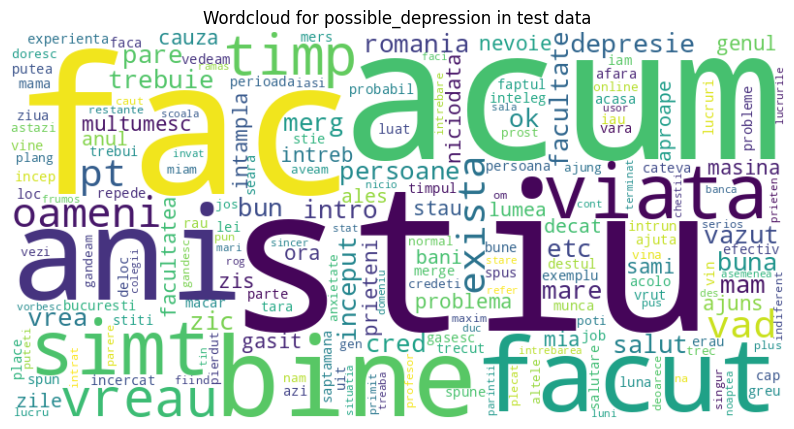

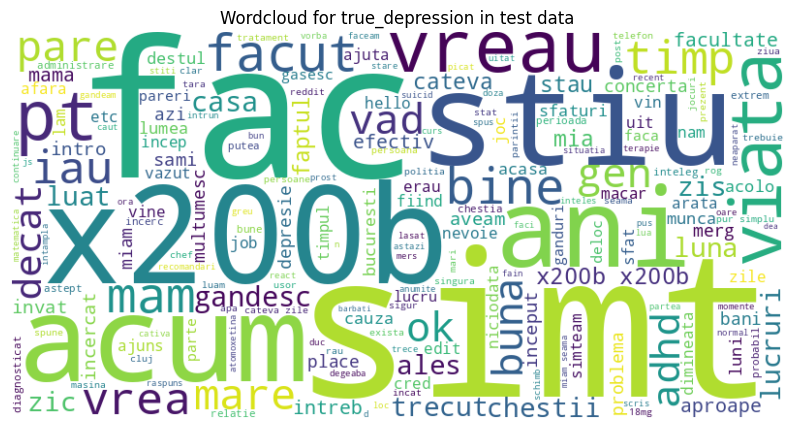

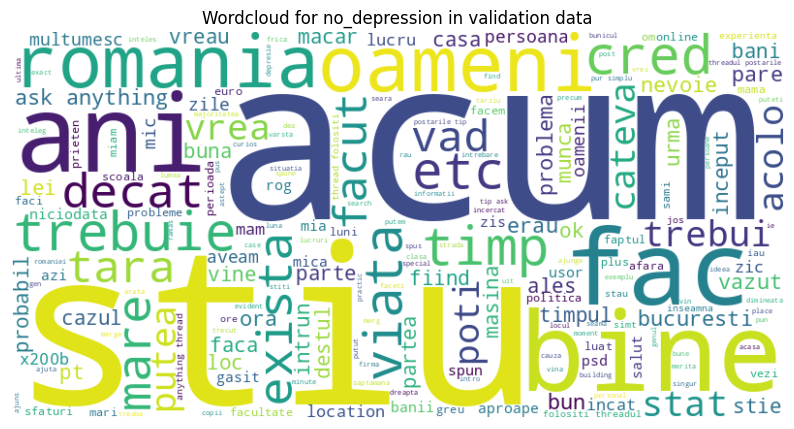

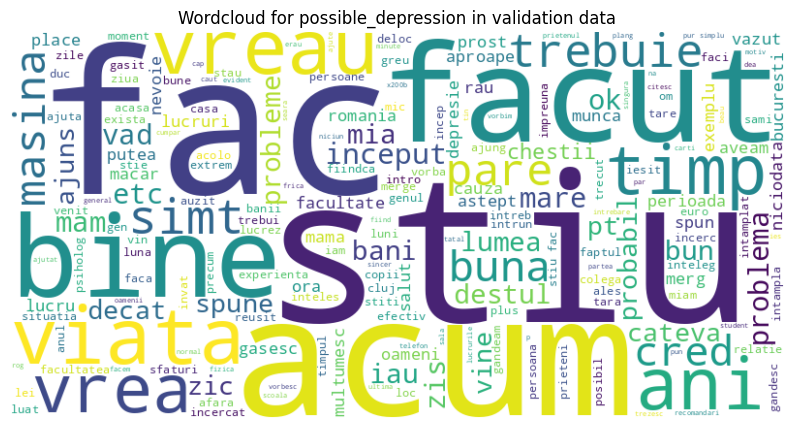

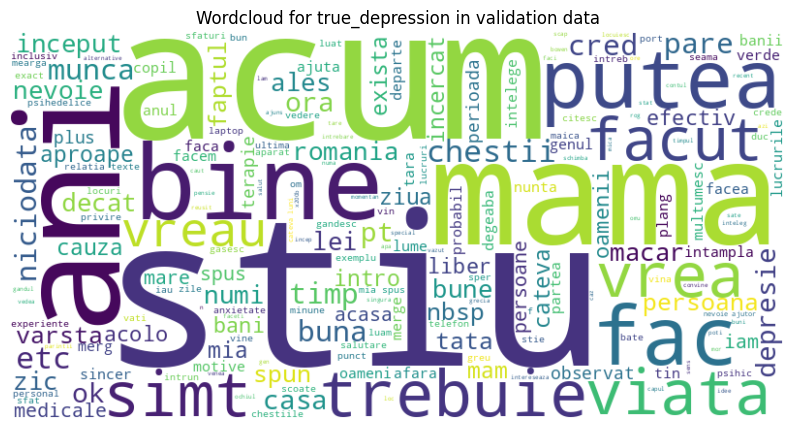

In [ ]:
wordcloud(train_df, "train")
wordcloud(test_df, "test")
wordcloud(validation_df, "validation")

### **HOW MANY USERS WE HAVE IN EACH CATEGORY**

In [ ]:
import json

def make_df(path):
  with open(path, 'r') as file:
    date_json = json.load(file)

  df = pd.DataFrame(date_json)

  return df

In [ ]:
df_with_depression = make_df('reddit_data_with_depression (3).json')
print(df_with_depression)

     user label1 label2                                              posts
0       5   TRUE  FALSE  [{'title': 'De când am început facultatea, sim...
1       6   TRUE  FALSE  [{'title': 'Ce peeling chimic îmi recomandați?...
2      12   TRUE  FALSE  [{'title': 'A ajuns lumea sa faca nunti si bot...
3      19   TRUE  FALSE  [{'title': 'Cum e la psiholog?', 'link': 'http...
4      21   TRUE  FALSE  [{'title': 'Legare trompe uterine în România',...
..    ...    ...    ...                                                ...
105   364   TRUE  FALSE  [{'title': 'Am nevoie de un sfat legat de o pr...
106   369   TRUE  FALSE  [{'title': 'Frustrarea vieții', 'link': 'https...
107   372   TRUE  FALSE  [{'title': 'Nu se vorbeste destul despre depre...
108   373   TRUE  FALSE  [{'title': 'Cum pot sa scap de depresie daca n...
109   380   TRUE  FALSE  [{'title': 'Help. Am aproape 30 de ani și nu ș...

[110 rows x 4 columns]


In [ ]:
df_with_true_depression = make_df('reddit_data_with_true_depression (3).json')
print(df_with_true_depression)

    user label1 label2                                              posts
0     26   TRUE   TRUE  [{'title': 'Pareri cartier Aviatiei', 'link': ...
1     34   TRUE   TRUE  [{'title': 'Simt că îmi irosesc viața', 'link'...
2     35   TRUE   TRUE  [{'title': 'Mama a crede in tot feluri de medi...
3     44   TRUE   TRUE  [{'title': 'Mutat recent singur, nu stiu cum s...
4     50   TRUE   TRUE  [{'title': 'condamnat dacă ești sărac/ă', 'lin...
5     51   TRUE   TRUE  [{'title': 'Cosmetice Pandera', 'link': 'https...
6     63   TRUE   TRUE  [{'title': 'Trecând Prin Iad: Călătoria de la ...
7     66   TRUE   TRUE                                                 []
8     84   TRUE   TRUE  [{'title': 'O noua teapa pe litoralul romanesc...
9     86   TRUE   TRUE  [{'title': 'O recomandare de ginecolog în Bucu...
10   108   TRUE   TRUE  [{'title': '[întrebare] ADHD la adulti- O sa f...
11   113   TRUE   TRUE  [{'title': 'Mustata', 'link': 'https://www.red...
12   121   TRUE   TRUE  [{'title': 'Am

In [ ]:
df_without_depression = make_df('reddit_data_without_depression (2).json')
print(df_without_depression)

     user label1 label2                                              posts
0       1  FALSE  FALSE  [{'title': 'Piersic sensibil', 'link': 'https:...
1       2  FALSE  FALSE  [{'title': 'Ce urmeaza sa iti iei de BlackFrid...
2       3  FALSE  FALSE  [{'title': 'Am ajuns alcoolic in 5 ani.', 'lin...
3       4  FALSE  FALSE  [{'title': 'Știe cineva ceva despre reverse-en...
4       7  FALSE  FALSE  [{'title': 'Te poti cununa religios fara nasi?...
..    ...    ...    ...                                                ...
225   371  FALSE  FALSE  [{'title': 'Romanu', psihoactivele si masina.'...
226   375  FALSE  FALSE  [{'title': 'Asistent medical.', 'link': 'https...
227   376  FALSE  FALSE  [{'title': 'Voi realizati ca USR n-a iesit cu ...
228   377  FALSE  FALSE  [{'title': 'Dependenta de zahar', 'link': 'htt...
229   379  FALSE  FALSE  [{'title': 'Ajutor pe tema viitorului', 'link'...

[230 rows x 4 columns]


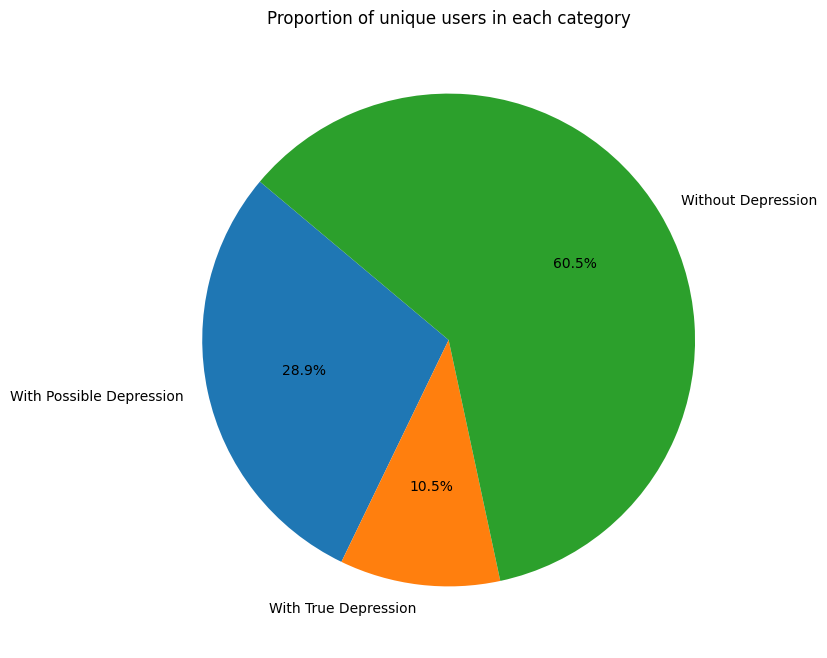

In [ ]:
def plot_unique_users_pie(df_list, labels):
    unique_users = [df['user'].nunique() for df in df_list]
    plt.figure(figsize=(8, 8))
    plt.pie(unique_users, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title('Proportion of unique users in each category')
    plt.show()

df_list = [df_with_depression, df_with_true_depression, df_without_depression]
labels = ['With Possible Depression', 'With True Depression', 'Without Depression']
plot_unique_users_pie(df_list, labels)

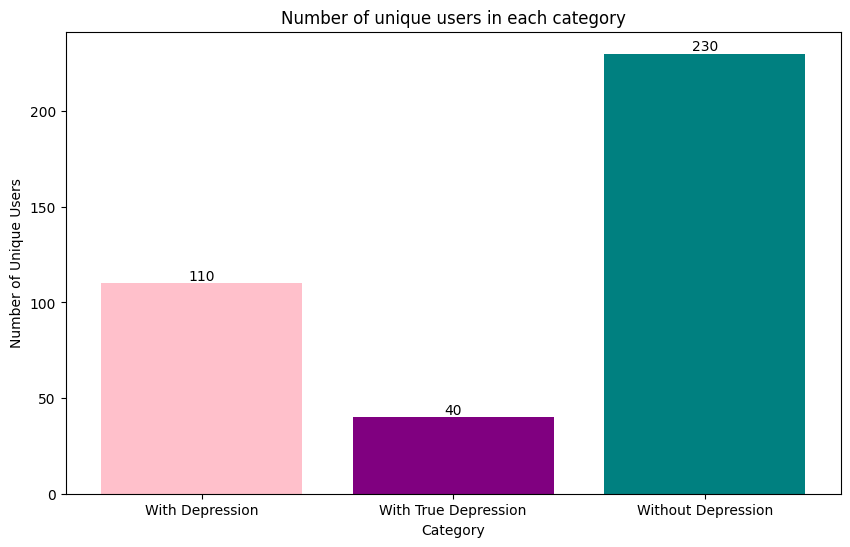

In [ ]:
def plot_unique_users_bar(df_list, labels):
    unique_users = [df['user'].nunique() for df in df_list]

    plt.figure(figsize=(10, 6))
    bars = plt.bar(labels, unique_users, color=['pink', 'purple', 'teal'])

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

    plt.title('Number of unique users in each category')
    plt.xlabel('Category')
    plt.ylabel('Number of Unique Users')
    plt.show()

df_list = [df_with_depression, df_with_true_depression, df_without_depression]
labels = ['With Depression', 'With True Depression', 'Without Depression']
plot_unique_users_bar(df_list, labels)